In [314]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [315]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 28

# Dataset reading

In [317]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [318]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [320]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [321]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_30 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 27)             │           297 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,367 (5.34 KB)

 Trainable params: 1,367 (5.34 KB)

 Non-trainable params: 0 (0.00 B)

In [322]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [323]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [324]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 91/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0505 - loss: 3.3002 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0528 - loss: 3.2904 - val_accuracy: 0.1493 - val_loss: 3.0004
Epoch 2/1000
 99/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1270 - loss: 2.9913
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1278 - loss: 2.9885 - val_accuracy: 0.3064 - val_loss: 2.6522
Epoch 3/1000
 92/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1943 - loss: 2.7505
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1961 - loss: 2.7441 - val_accuracy: 0.3529 - val_loss: 2.3873
Epoch 4/1000
 96/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2346 - loss: 2.5721
Epoch 4: saving model to model/keypoint_classifier/keypoint_class

In [325]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8245 - loss: 0.8259 


In [326]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [327]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[1.9061673e-02 4.3126736e-02 6.2523247e-04 1.7518306e-04 3.9819021e-02
 9.1740908e-03 9.9842273e-11 9.4894216e-07 3.1979451e-01 3.2360305e-03
 1.2403706e-04 4.9626227e-03 3.7942438e-03 9.1319962e-04 1.5852718e-04
 1.8207187e-05 3.5938751e-06 2.9565890e-05 9.7383119e-02 4.1531366e-03
 2.1880423e-03 4.6869187e-05 2.5698281e-04 1.4254540e-04 4.5081016e-01
 1.7145345e-06 9.3274114e-16]
24


# Confusion matrix

136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step


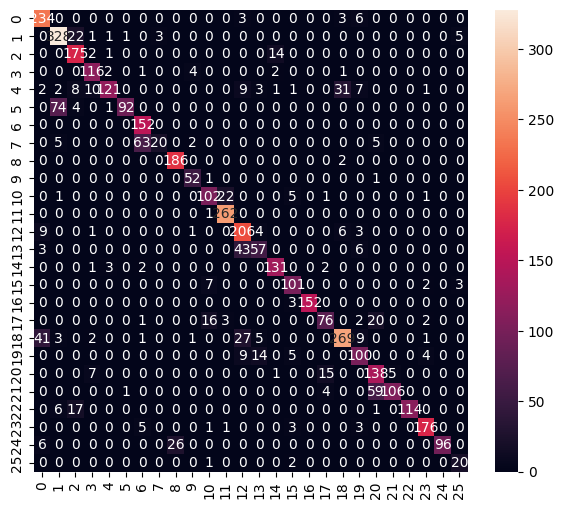

Classification Report
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       246
           1       0.78      0.91      0.84       361
           2       0.77      0.91      0.84       192
           3       0.83      0.92      0.87       126
           4       0.94      0.62      0.74       196
           5       0.98      0.54      0.69       171
           6       0.68      1.00      0.81       152
           7       0.87      0.21      0.34        95
           8       0.88      0.99      0.93       188
           9       0.87      0.96      0.91        54
          10       0.79      0.77      0.78       132
          11       0.91      1.00      0.95       263
          12       0.69      0.90      0.78       230
          13       0.69      0.52      0.59       109
          14       0.88      0.94      0.91       139
          15       0.84      0.89      0.87       113
          16       1.00      0.98      0.99       155
     

In [328]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [329]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [330]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\TIENTH~1\AppData\Local\Temp\tmpn4d53pfr\assets


INFO:tensorflow:Assets written to: C:\Users\TIENTH~1\AppData\Local\Temp\tmpn4d53pfr\assets


Saved artifact at 'C:\Users\TIENTH~1\AppData\Local\Temp\tmpn4d53pfr'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_15')
Output Type:
  TensorSpec(shape=(None, 27), dtype=tf.float32, name=None)
Captures:
  2366492059328: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366457393776: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366255620416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366497140656: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366497130624: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2366497317184: TensorSpec(shape=(), dtype=tf.resource, name=None)


7600

# Inference test

In [331]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [332]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [333]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [334]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [335]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.9061666e-02 4.3126781e-02 6.2523287e-04 1.7518307e-04 3.9819047e-02
 9.1740992e-03 9.9842093e-11 9.4894136e-07 3.1979442e-01 3.2360309e-03
 1.2403708e-04 4.9626236e-03 3.7942443e-03 9.1319974e-04 1.5852727e-04
 1.8207207e-05 3.5938751e-06 2.9565923e-05 9.7383134e-02 4.1531352e-03
 2.1880434e-03 4.6869191e-05 2.5698307e-04 1.4254554e-04 4.5081022e-01
 1.7145379e-06 9.3273754e-16]
24
